# Import necessasary libraries¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Type'].unique()

array([1, 2, 3])

In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
X_features = df.drop('Type', axis=1)

In [10]:


# Columns list
cols = X_features.columns

# Function to cap outliers
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

# Apply function
df = cap_outliers_iqr(df, cols)


In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258
std,0.775035,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000


# VISUALIZATIONS

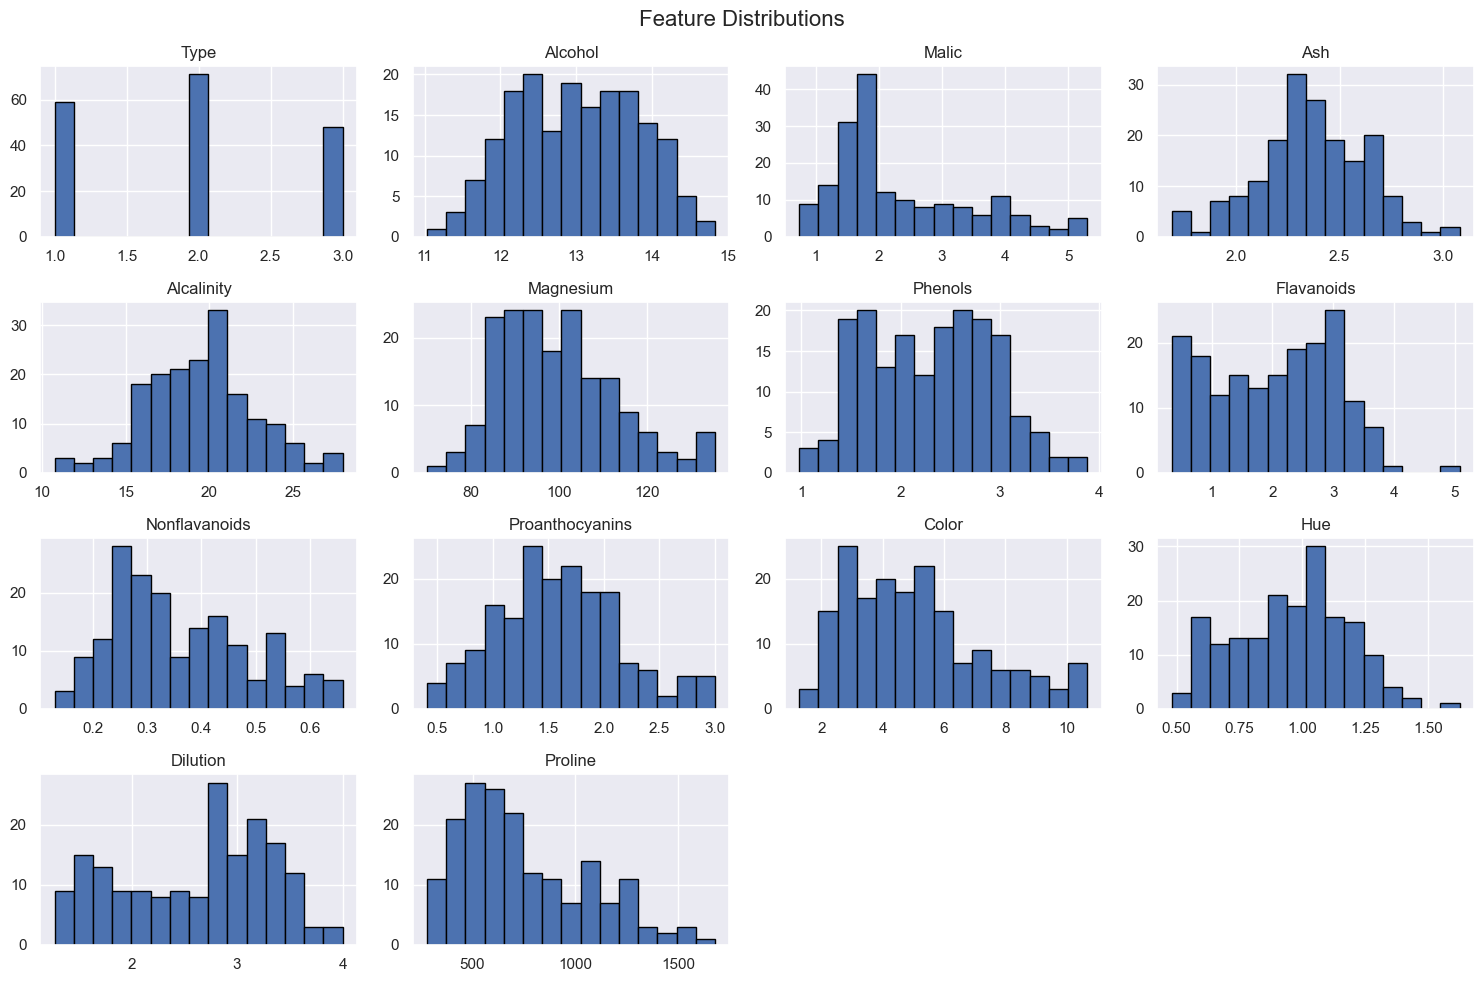

In [12]:
#histogram
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

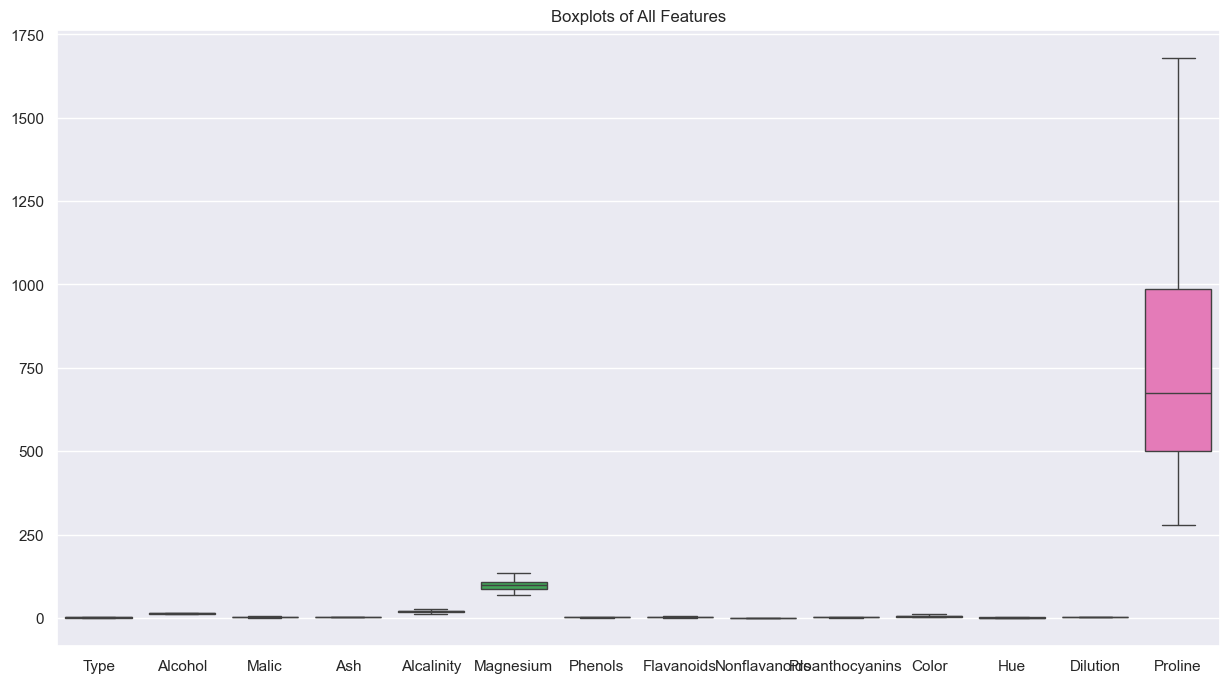

In [13]:
#  Boxplots - Detect Outliers & Spread
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots of All Features")
plt.show()

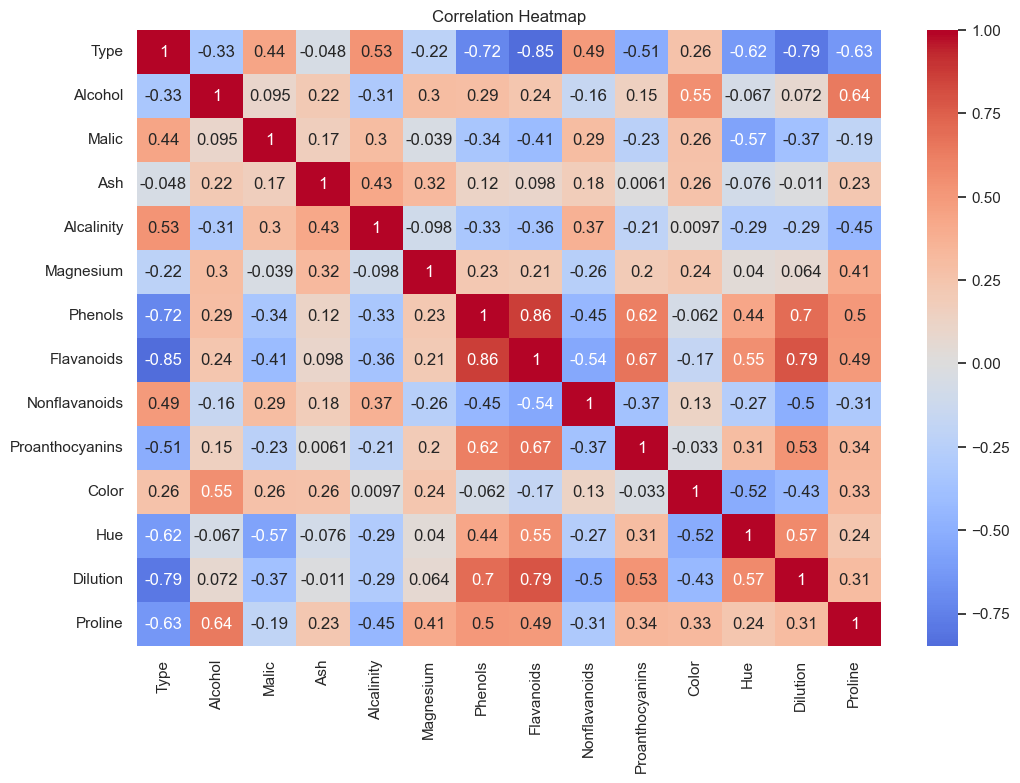

In [14]:
#Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

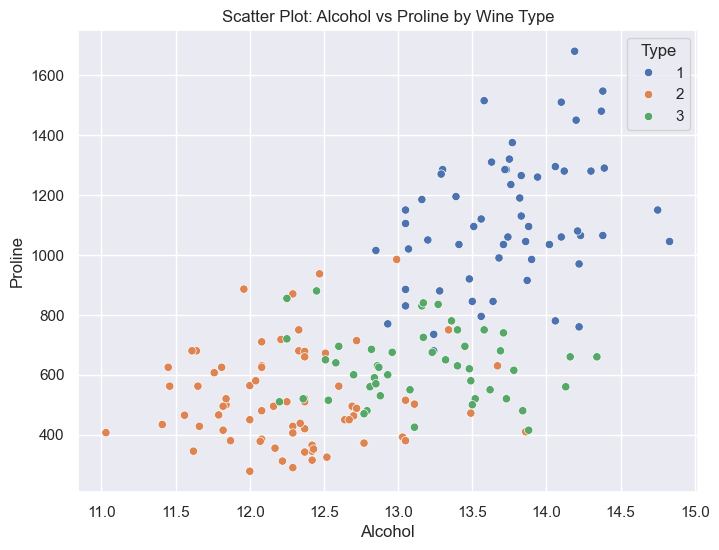

In [15]:
#scatterplot Alcohol vs Proline
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Alcohol'], y=df['Proline'], hue=df['Type'], data=df, palette='deep')
plt.title("Scatter Plot: Alcohol vs Proline by Wine Type")
plt.show()

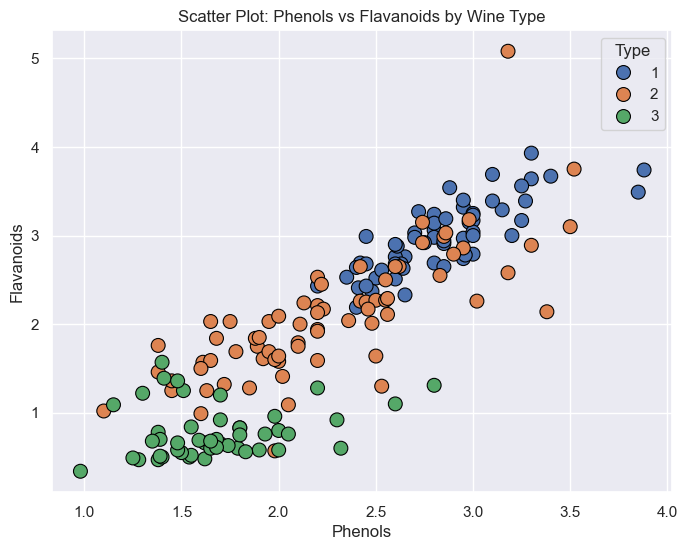

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Phenols', y='Flavanoids', hue='Type', data=df, palette='deep',edgecolor='black',s=100)
plt.title("Scatter Plot: Phenols vs Flavanoids by Wine Type")
plt.show()

<Figure size 1000x800 with 0 Axes>

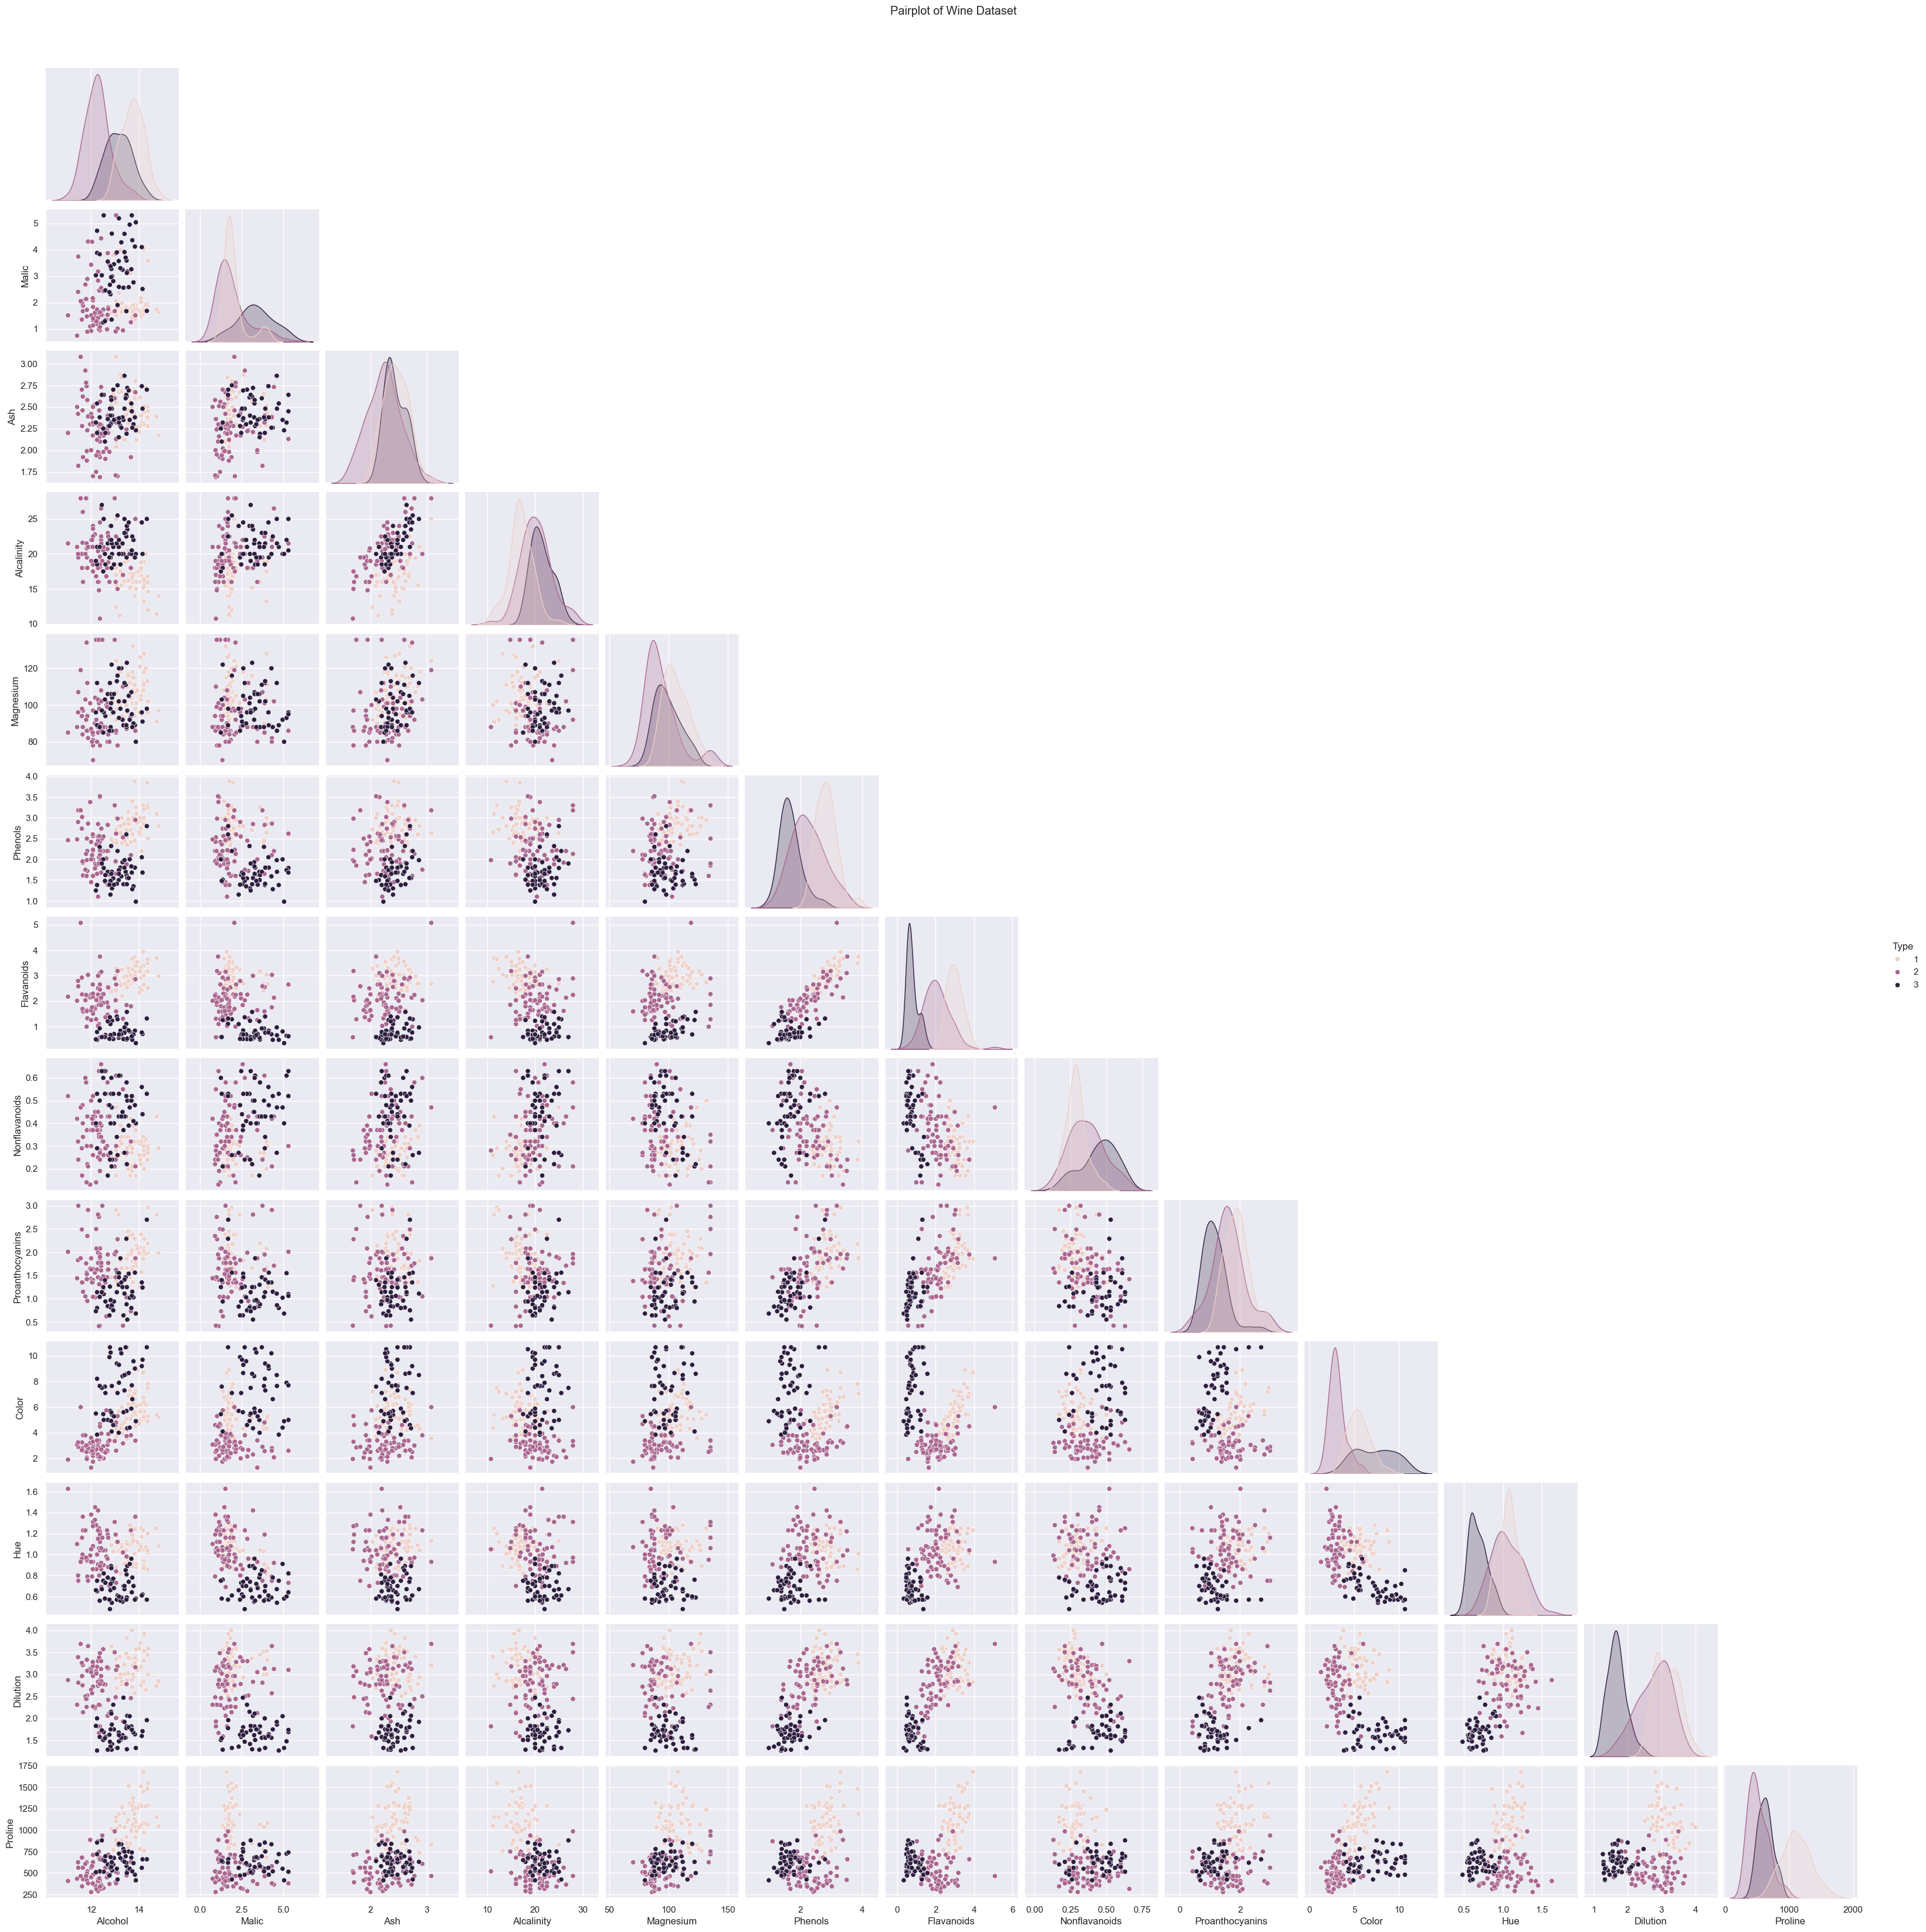

In [17]:
plt.figure(figsize=(10, 8))

sns.pairplot(df, hue='Type',diag_kind='kde',corner=True)
plt.suptitle("Pairplot of Wine Dataset", y=1.02)
plt.show()

# Dimensionality Reduction with PCA:

In [18]:

sc = StandardScaler()# Mean=0 SD =1

x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]], shape=(178, 14))

In [19]:
pca=PCA()
pcs = pca.fit_transform(x)

In [20]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.561968,1.528967,-0.130558,-0.102725,0.749767,0.241582,0.687821,-0.011639,-0.512705,-1.068876,-0.371279,0.559975,-0.391569,0.195619
1,-2.544330,-0.329993,-2.041603,-0.448040,-0.193861,0.959958,-0.007630,-0.981717,0.320779,-0.020547,-0.125640,0.350435,-0.185027,0.137040
2,-2.806546,1.042225,1.016791,0.740693,-0.410847,-0.481234,0.455990,0.414297,1.213945,0.070917,-0.292712,0.045202,0.047917,-0.056468
3,-3.944287,2.793264,-0.154956,0.634237,-0.235032,-0.266787,-0.403404,-0.681048,-0.043371,-0.118619,0.682974,-0.354389,-0.500658,0.003967
4,-1.415866,0.953430,2.117093,-0.479292,0.254285,0.575020,0.492906,-0.392037,-0.216243,-0.128434,-0.573345,-0.134190,0.313438,-0.498089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.575821,2.165115,-0.378914,0.731787,-0.921869,1.039551,0.611655,0.171300,-0.100215,0.329309,0.112341,0.087508,-0.239865,0.096021
174,2.951568,1.793183,0.210665,0.422008,0.142318,0.013560,0.131525,0.575910,0.012272,0.246623,0.238265,-0.314203,-0.153762,-0.031829
175,3.019601,2.860911,-0.975719,0.509405,1.123057,-0.094408,0.892320,-0.019600,-0.036757,0.199549,0.599992,0.656853,0.030509,-0.057895
176,2.739308,2.390595,-0.562449,-0.479537,0.878447,-1.114849,0.896294,-0.379681,0.034488,-0.512213,0.348478,0.329841,-0.192037,0.079584


In [21]:
pca.explained_variance_ratio_

array([0.39807866, 0.18209648, 0.1013214 , 0.06619413, 0.05983257,
       0.04726317, 0.03753501, 0.02554538, 0.02108632, 0.01880492,
       0.01630103, 0.01233512, 0.00955758, 0.00404823])

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.39807866, 0.58017514, 0.68149655, 0.74769068, 0.80752325,
       0.85478642, 0.89232143, 0.9178668 , 0.93895312, 0.95775804,
       0.97405907, 0.98639419, 0.99595177, 1.        ])

scree plot

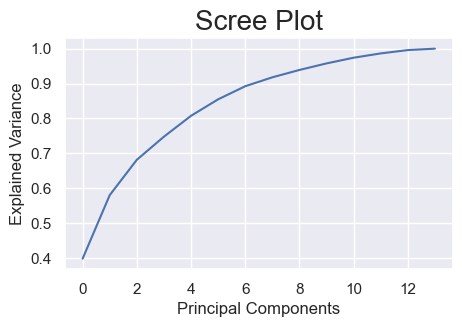

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)
plt.show()

In [24]:
pca = PCA(n_components=2)#PCA Constant Grapg-Varience=0
pcs = pca.fit_transform(x)
pcs

array([[-3.56196816,  1.52896694],
       [-2.54433006, -0.32999258],
       [-2.80654586,  1.04222492],
       [-3.94428663,  2.79326448],
       [-1.41586551,  0.95343036],
       [-3.31467737,  2.15987637],
       [-2.768838  ,  1.16001791],
       [-2.40349271,  1.6934343 ],
       [-2.81956282,  0.88875097],
       [-3.01921539,  0.78094091],
       [-3.70084217,  1.30750101],
       [-2.11892156,  0.59449672],
       [-2.44752356,  0.6434244 ],
       [-3.71609766,  1.08602601],
       [-4.4884358 ,  2.09514172],
       [-2.62175728,  1.73411029],
       [-2.49498019,  2.40231306],
       [-2.24009589,  1.69014319],
       [-3.76263778,  2.55187336],
       [-2.40909964,  1.1367335 ],
       [-3.37137429,  0.86680075],
       [-1.48306396,  0.27509438],
       [-2.83726793, -0.09048489],
       [-2.00611227, -0.51712729],
       [-2.11166213, -0.32053711],
       [-1.40221513,  0.88237546],
       [-2.13364186,  0.67562027],
       [-1.63101187, -0.11919969],
       [-2.516044  ,

In [25]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

,PC1,PC2
0,-3.561968,1.528967
1,-2.544330,-0.329993
2,-2.806546,1.042225
3,-3.944287,2.793264
4,-1.415866,0.953430
...,...,...
173,3.575821,2.165115
174,2.951568,1.793183
175,3.019601,2.860911
176,2.739308,2.390595


 # K-Means Clustering with PCA

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
#kmeans_pca = KMeans(n_clusters=3, random_state=42) #We know there are 3 wine types, so n_clusters=3.
#clusters_pca = kmeans_pca.fit_predict(X)


In [28]:
km_pca=KMeans(n_clusters=3, random_state=42) # default 8 cluster
yp=km_pca.fit_predict(pcs)
yp

C:\Users\vaish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\vaish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\vaish\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vaish\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [29]:
len(yp)

178

In [30]:
km_pca.cluster_centers_

array([[ 0.1296125 , -1.76956464],
       [ 3.06307627,  1.22420856],
       [-2.56088346,  0.9447518 ]])

In [31]:
pcs

array([[-3.56196816,  1.52896694],
       [-2.54433006, -0.32999258],
       [-2.80654586,  1.04222492],
       [-3.94428663,  2.79326448],
       [-1.41586551,  0.95343036],
       [-3.31467737,  2.15987637],
       [-2.768838  ,  1.16001791],
       [-2.40349271,  1.6934343 ],
       [-2.81956282,  0.88875097],
       [-3.01921539,  0.78094091],
       [-3.70084217,  1.30750101],
       [-2.11892156,  0.59449672],
       [-2.44752356,  0.6434244 ],
       [-3.71609766,  1.08602601],
       [-4.4884358 ,  2.09514172],
       [-2.62175728,  1.73411029],
       [-2.49498019,  2.40231306],
       [-2.24009589,  1.69014319],
       [-3.76263778,  2.55187336],
       [-2.40909964,  1.1367335 ],
       [-3.37137429,  0.86680075],
       [-1.48306396,  0.27509438],
       [-2.83726793, -0.09048489],
       [-2.00611227, -0.51712729],
       [-2.11166213, -0.32053711],
       [-1.40221513,  0.88237546],
       [-2.13364186,  0.67562027],
       [-1.63101187, -0.11919969],
       [-2.516044  ,

In [32]:
score = silhouette_score(pcs, yp)
print(f"Silhouette Score (PCA Data): {score:.3f}")

Silhouette Score (PCA Data): 0.601


The Silhouette Score for K-Means clustering on PCA-reduced data remained around 0.307, 
even when increasing components from 2 to 6. This indicates that additional PCA components did not significantly improve cluster separability, 
likely because the original variance preserved by PCA does not align perfectly with the class boundaries in the wine dataset.

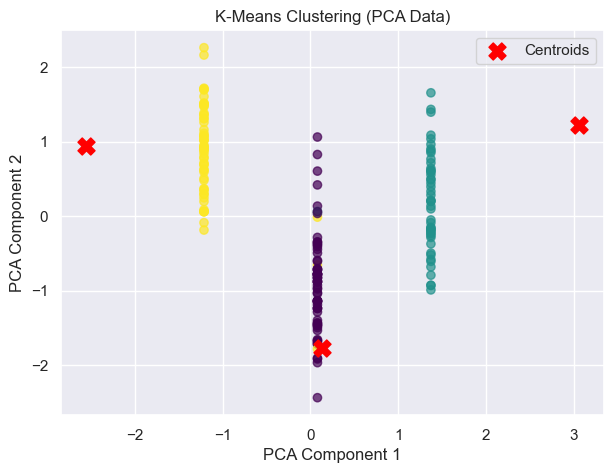

In [70]:
plt.figure(figsize=(7, 5))
plt.scatter(x[:, 0], x[:, 1], c=yp, cmap='viridis', alpha=0.7)
plt.scatter(km_pca.cluster_centers_[:, 0], km_pca.cluster_centers_[:, 1], 
            c='red', s=150, marker='X', label='Centroids')
plt.title("K-Means Clustering (PCA Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [62]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(pcs)
    wcss.append(km.inertia_)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

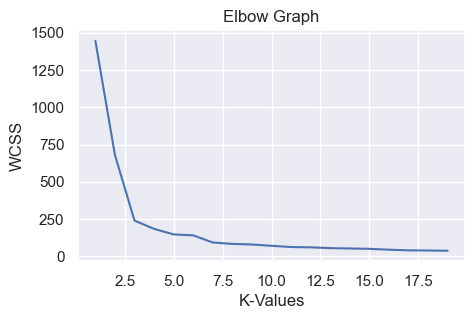

In [63]:
plt.plot(range(1,20),wcss)
#plt.axvline(x = 5, linestyle = '-.', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [57]:
km_pca.inertia_

239.75265972324792

# clustring without PCA

In [58]:
km_orig=KMeans(n_clusters=3, random_state=42) # default 8 cluster
yp_orig=km_orig.fit_predict(x)
yp_orig

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [59]:
score_orig = silhouette_score(x, yp_orig)
print(score_orig)

0.3069772963964642


In [61]:
km_orig.inertia_

1273.5619590722624

In [66]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vaish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

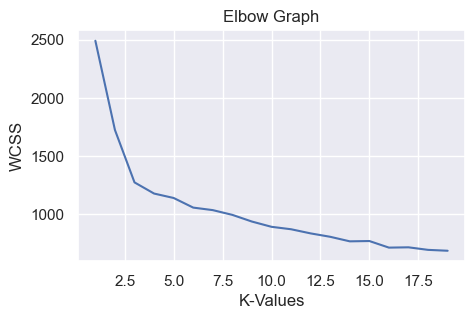

In [67]:
plt.plot(range(1,20),wcss)
#plt.axvline(x = 5, linestyle = '-.', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

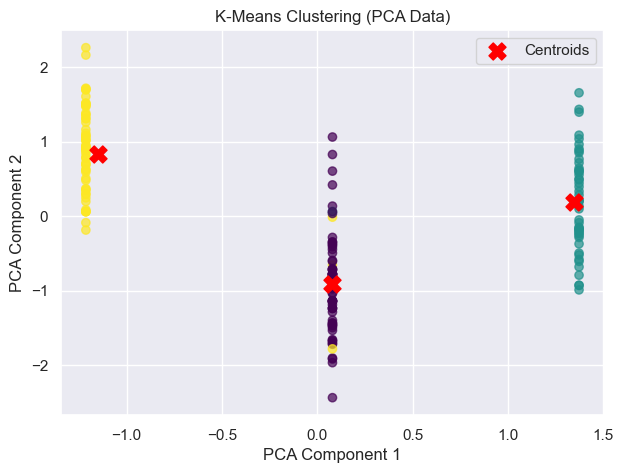

In [69]:
plt.figure(figsize=(7, 5))
plt.scatter(x[:, 0], x[:, 1], c=yp, cmap='viridis', alpha=0.7)
plt.scatter(km_orig.cluster_centers_[:, 0], km_orig.cluster_centers_[:, 1], 
            c='red', s=150, marker='X', label='Centroids')
plt.title("K-Means Clustering (PCA Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# insights

PCA reduced 13 features to 2 principal components capturing most variance.

Clusters became more compact and well-separated in PCA space.

Some border points still misclassified — normal for unsupervised methods.

IQR outlier handling improved stability of PCA and cluster centers.



# comparision

 In the original scaled data with 13 features, K-Means achieved a silhouette score of around 0.30.
When using PCA with 2 principal components, the silhouette score improved to 0.601.
 the PCA case, indicating a stronger alignment between the clusters and the actual wine types.



# conclusion

PCA + K-Means produced higher silhouette score, indicating better cluster separation.

PCA removed noise from irrelevant dimensions, improving agreement with true labels 

For visualization, PCA(2) + K-Means is best

